<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Machine Learning Methods: K-Nearest Neighbour</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>
References: Information Source from Monash Faculty of Information Technology

---

### **K-Nearest Neighbour**

In the K-nearest neighbour algorithm, we treat all training instances as points positioned in n-dimensional space, each with a corresponding target value. A new instance gets classified by locating its k closest neighbours within this n-dimensional space and choosing the class label that appears most frequently among those neighbours. Each instance **x** = (v₁, v₂, ..., vₙ) has an associated target value **y**

#### **Classification Process for New Instance**
1. **Locate the closest neighbours**
2. **Conduct a majority vote from the neighbours**

#### **1-nearest neighbour**
Consider data points plotted in 2D space labeled as either orange or blue, with a new point currently shown in pink that needs classification.

Using 1-nearest neighbour, we identify the single closest point to the pink point, which happens to be a orange point. We perform a majority vote, resulting in orange classification, so we assign the pink point as orange.

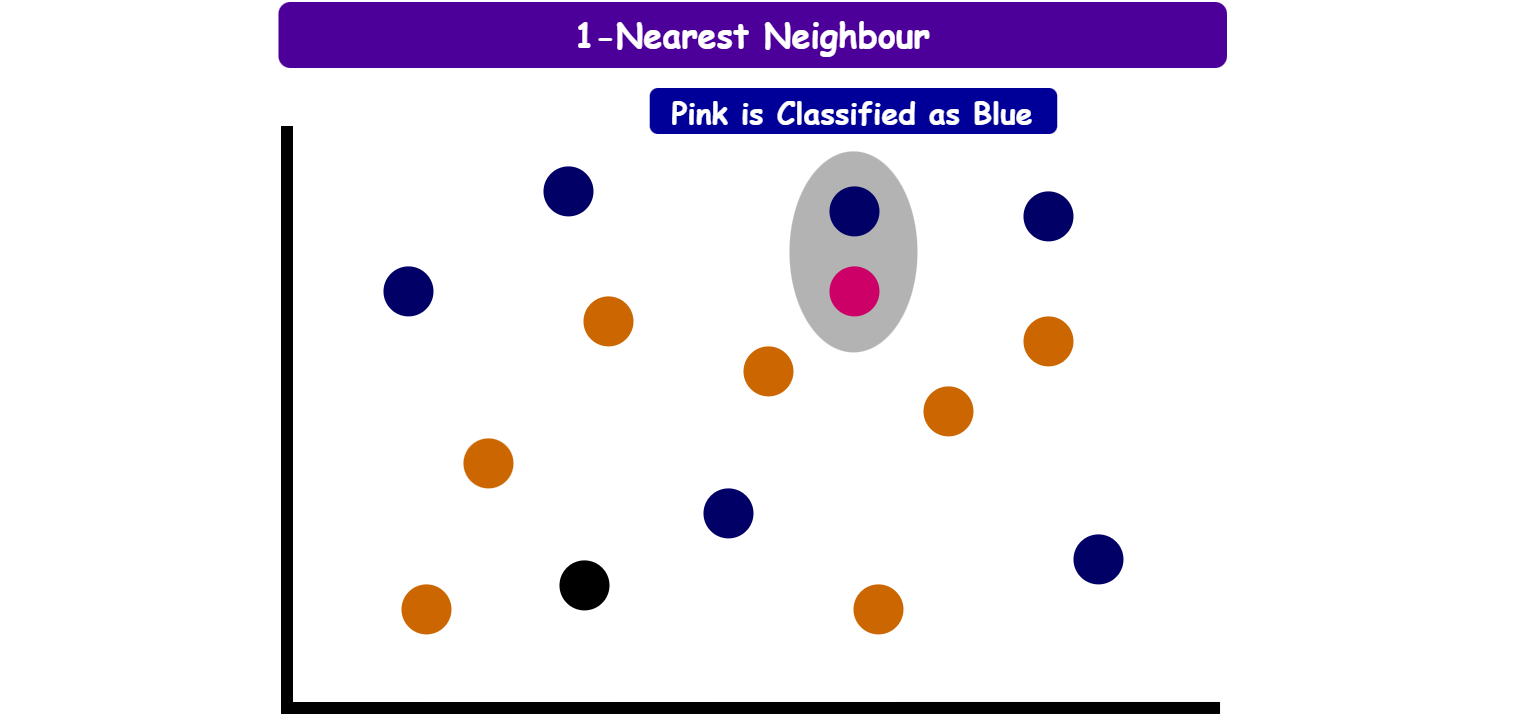

#### **3-nearest neighbour**
Alternatively, when applying 3-nearest neighbour, we search for the 3 closest points to our pink point and discover two blue points and one orange point. Consequently, our majority vote would classify the pink point as blue.

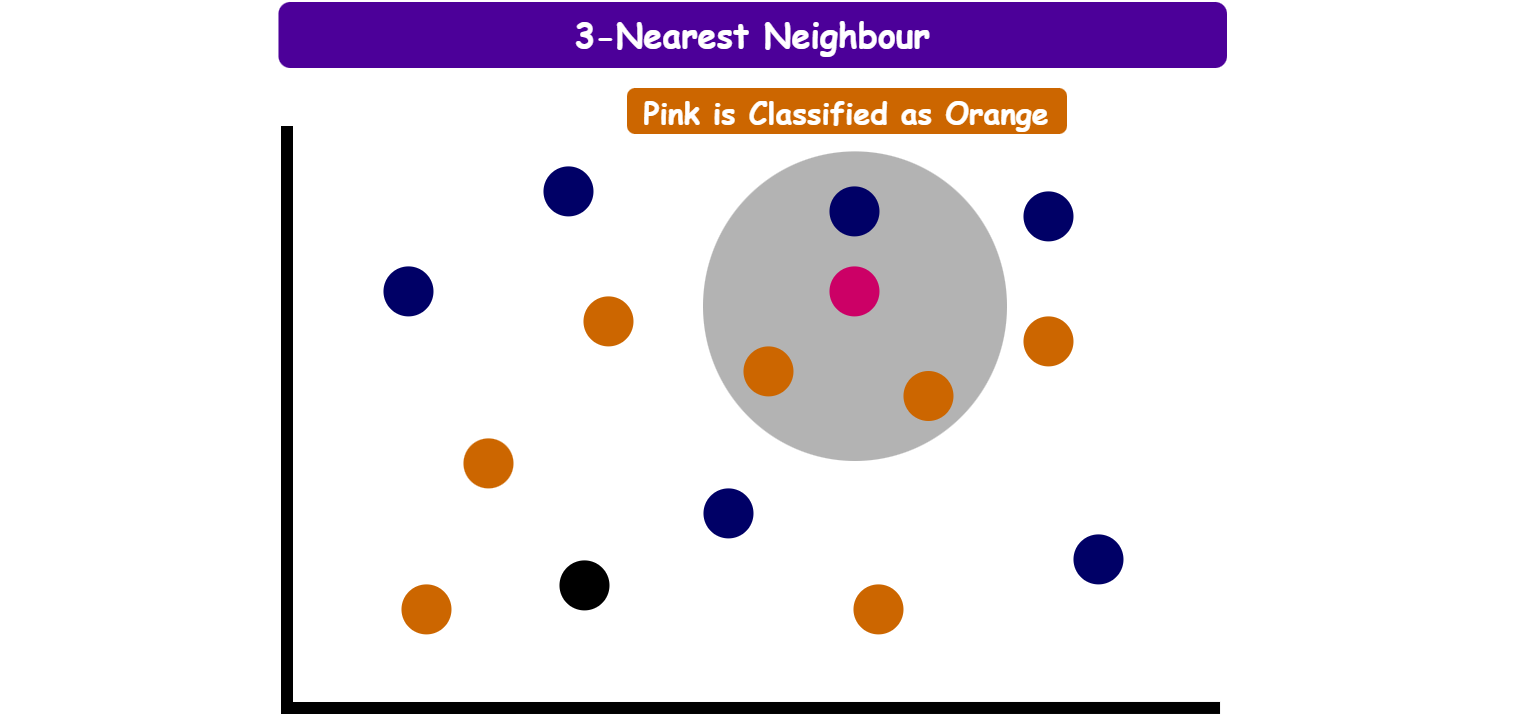

#### **Computing Similarity**

**Measuring distance between different instances**

When our data features are continuous, we apply Euclidean distance, and when our features are categorical, we use the Jaccard coefficient.

For instance, if an instance is represented by (v₁, v₂, ..., vₙ), vₖ represents the value of the k-th feature.

**Continuous features: Euclidean distance**
$$Ed(x_i, x_j) = \sqrt{\sum_{k=1}^{n}(v_{ik} - v_{jk})^2}$$

**Categorical features: Jaccard coefficient**
$$Jc(x_i, x_j) = \frac{|[v_{i1},...,v_{in}] \cap [v_{j1},...,v_{jn}]|}{|[v_{i1},...,v_{in}] \cup [v_{j1},...,v_{jn}]|}$$

#### **Example**

**Euclidean distance**
For continuous data, we apply the Euclidean distance:

Continuous features: x₁ = {0.7, 30, 80, 10}, x₂ = {0.2, 32, 85, 40}

$$Ed(x_i, x_j) = \sqrt{(0.7 - 0.2)^2 + (30 - 32)^2 + (80 - 85)^2 + (10 - 40)^2}$$
$$= 30.48$$

**Jaccard coefficient**
For categorical features, we apply the Jaccard coefficient:

Categorical features: x₁ = {red, large, smooth, hard}, x₂ = {blue, large, smooth, soft}

$Jc(x_i, x_j) = \frac{|{red,large,smooth,hard} \cap {blue,large,smooth,soft}|}{|{red,large,smooth,hard} \cup {blue,large,smooth,soft}|}$
$= \frac{|{large,smooth}|}{|{red,blue,large,smooth,hard,soft}|} = \frac{2}{6} = 0.33$

The intersection of the categorical features contains two elements, and the union contains six. Therefore the Jaccard coefficient is ⅓.

#### **Parameter Learning**

**No training exists in this algorithm.** The training data and distance functions are all we need for the algorithm to function.

The model essentially **memorises** the entire 'training' data and references it whenever it needs to classify a new instance. This means that additional data causes the model to expand and demands more distance calculations for every classification. This makes the algorithm extremely straightforward overall but potentially quite slow.

---

### **Worked Example: K-Nearest Neighbour**

Given the following 3D dataset with associated class labels, classify a new data point using K-nearest neighbour.

**Dataset:**
| x₁ | x₂ | x₃ | Class |
|----|----|----|-------|
| 3  | 5  | 3  | 1     |
| 2  | 0  | 4  | 0     |
| 6  | 3  | 7  | 1     |
| 3  | 7  | 5  | 1     |
| 0  | 1  | 1  | 0     |
| 1  | 2  | 2  | 0     |

**New data point:** x = (x₁ = 3, x₂ = 3, x₃ = 3)

**Questions:**
1. What class would a 1-nearest neighbour predict for x?
2. What class would a 3-nearest neighbour predict for x?

**Step 1: Calculate Euclidean distances from the new point to all training points**

Using the Euclidean distance formula:
$$Ed(x_i, x_j) = \sqrt{(x_{i1} - x_{j1})^2 + (x_{i2} - x_{j2})^2 + (x_{i3} - x_{j3})^2}$$

For new point x = (3, 3, 3):

**Distance to point 1:** (3, 5, 3, Class 1)
$$Ed = \sqrt{(3-3)^2 + (3-5)^2 + (3-3)^2} = \sqrt{0 + 4 + 0} = \sqrt{4} = 2.0$$

**Distance to point 2:** (2, 0, 4, Class 0)
$$Ed = \sqrt{(3-2)^2 + (3-0)^2 + (3-4)^2} = \sqrt{1 + 9 + 1} = \sqrt{11} ≈ 3.32$$

**Distance to point 3:** (6, 3, 7, Class 1)
$$Ed = \sqrt{(3-6)^2 + (3-3)^2 + (3-7)^2} = \sqrt{9 + 0 + 16} = \sqrt{25} = 5.0$$

**Distance to point 4:** (3, 7, 5, Class 1)
$$Ed = \sqrt{(3-3)^2 + (3-7)^2 + (3-5)^2} = \sqrt{0 + 16 + 4} = \sqrt{20} ≈ 4.47$$

**Distance to point 5:** (0, 1, 1, Class 0)
$$Ed = \sqrt{(3-0)^2 + (3-1)^2 + (3-1)^2} = \sqrt{9 + 4 + 4} = \sqrt{17} ≈ 4.12$$

**Distance to point 6:** (1, 2, 2, Class 0)
$$Ed = \sqrt{(3-1)^2 + (3-2)^2 + (3-2)^2} = \sqrt{4 + 1 + 1} = \sqrt{6} ≈ 2.45$$

#### **Step 2: Rank distances in ascending order**

| Rank | Point | Distance | Class |
|------|-------|----------|-------|
| 1    | (3,5,3) | 2.0    | 1     |
| 2    | (1,2,2) | 2.45   | 0     |
| 3    | (2,0,4) | 3.32   | 0     |
| 4    | (0,1,1) | 4.12   | 0     |
| 5    | (3,7,5) | 4.47   | 1     |
| 6    | (6,3,7) | 5.0    | 1     |

#### **Step 3: Make predictions**

**1-Nearest Neighbour:**
- Closest point: (3,5,3) with distance 2.0 and Class 1
- **Prediction: Class 1**

**3-Nearest Neighbour:**
- 3 closest points: 
  - (3,5,3) with Class 1
  - (1,2,2) with Class 0  
  - (2,0,4) with Class 0
- Majority vote: 2 votes for Class 0, 1 vote for Class 1
- **Prediction: Class 0**

#### **Final Answers**
1. **1-nearest neighbour predicts: Class 1**
2. **3-nearest neighbour predicts: Class 0**

---

### **Python Exercise: K-Nearest Neighbour**

K-Near Neighbour algorithm is suited for classification of non-linear data which exhibits local patterns. It classifies new data points by finding the k nearest neighbors in n-dimensional feature space using distance metrics (commonly Euclidean distance) and assigns the majority class. Well-suited for Image Recognition (pixels), Text Classification, and Pattern Recognition.

The Example Below shows the Wine Dataset Example from Scikit-Learn Library.

#### **1) Dataset Information**

In [18]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets

# Load Scikit Learn Built-in Dataset
wine_dataset = datasets.load_wine()

x_data =wine_dataset.data  # Features: 13 chemical properties of wine
y_data =wine_dataset.target  # Target: 0=class_0, 1=class_1, 2=class_2 (Different Wine Cultivars)

# Create a Data Frame for ease of Reference
df = pd.DataFrame(x_data, columns = wine_dataset.feature_names)
df['wine_cultivator_class'] = y_data

# Print Dataset Information
print("Scikit Learn Dataset Information:")
print(f"Number of Wine Samples: {x_data.shape[0]}") # Print the Number of Rows (Data Samples)
print(f"Number of Wine Samples: {x_data.shape[1]}") # Print the Number of Columns (Features)
print(f"Name of the Wine Cultivators Classes: \n{wine_dataset.target_names}")
print(f"Wine Features Include: ")

feature_descriptions = [ "Alcohol content", "Malic acid", "Ash", "Alkalinity of ash", "Magnesium", "Total phenols", 
    "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline" ]

print(feature_descriptions)

Scikit Learn Dataset Information:
Number of Wine Samples: 178
Number of Wine Samples: 13
Name of the Wine Cultivators Classes: 
['class_0' 'class_1' 'class_2']
Wine Features Include: 
['Alcohol content', 'Malic acid', 'Ash', 'Alkalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 'Proline']



#### **2) Feature Scaling (Important for K-NN)**

The algorithm uses distance calculations so the features have to scaled to the same range. The data has to be pre-poscessing using a scaling function as shown below: 

$$\text{scaled\_value} = \frac{\text{original\_value} - \text{mean}}{\text{standard\_deviation}}$$


In [27]:
print("Example Data Before Feature Scaling:")
print(f"1) Alcohol: {x_data[:, 0].min():.1f} to {x_data[:, 0].max():.1f}")
print(f"2) Proline: {x_data[:, -1].min():.0f} to {x_data[:, -1].max():.0f}")

# Pre-processing: Scale the Features to the Same Range
scaler = sklearn.preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x_data)

print("\nData After Feature Scaling: \nAll Features Now have Mean ≈ 0, Standard Deviation ≈ 1")
print(f"1) Alcohol: {x_scaled[:, 0].min():.2f} to {x_scaled[:, 0].max():.2f}")
print(f"2) Proline: {x_scaled[:, -1].min():.2f} to {x_scaled[:, -1].max():.2f}")

Example Data Before Feature Scaling:
1) Alcohol: 11.0 to 14.8
2) Proline: 278 to 1680

Data After Feature Scaling: 
All Features Now have Mean ≈ 0, Standard Deviation ≈ 1
1) Alcohol: -2.43 to 2.26
2) Proline: -1.49 to 2.97
